✈ :

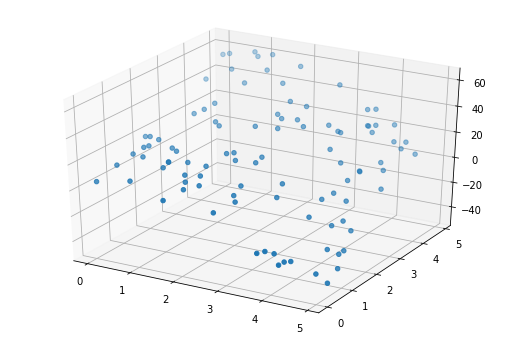

In [44]:
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import torch.nn.functional as F
import torch
import torch.nn as nn
import random
import numpy as np
import matplotlib.pyplot as plt

### y = -3*x1**2 + x2**2 + 3*x1 + 7*x2 + 4

x1 = np.random.rand(100,1)*5
x2 = np.random.rand(100,1)*5
y = -3*x1**2 + x2**2 + 3*x1 + 7*x2 + 4 + np.random.randn(100,1)

fig = plt.figure(figsize=(9,6))
ax= fig.add_subplot(111,projection='3d')
ax.scatter(x1,x2,y)

In [45]:
X = np.concatenate((x1**2,x2**2,x1,x2,x1**0),axis=1)

X = torch.Tensor(X)
y = torch.Tensor(y)



In [46]:
class twovari_regression(nn.Module):
  def __init__(self,dimension):
    super().__init__()
    self.function = nn.Linear(dimension*2+1,1)
  def forward(self,X):
    return self.function(X)

In [47]:
lr = 0.1
epoch = 1000
model = twovari_regression(2)
optimizer = torch.optim.Adam(model.parameters(),lr=lr)


In [48]:
for i in range(epoch):
  y_pred = model(X)
  optimizer.zero_grad()
  loss = torch.mean((y-y_pred)**2)
  loss.backward()
  optimizer.step()

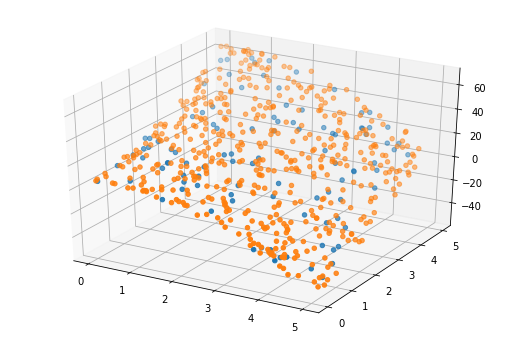

In [49]:
fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1,x2,y)

xx1 = np.random.rand(500,1)*5
xx2 = np.random.rand(500,1)*5
XX = np.concatenate((xx1**2,xx2**2,xx1,xx2,xx1**0),axis=1)
XX = torch.Tensor(XX)
ax.scatter(xx1,xx2,model(XX).tolist())
